In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import re
# import os
# import fileinput
import json
# import io
import collections
import datetime
%matplotlib inline

In [2]:
parsed_data = pd.read_csv("output_4_14.csv", sep=",")

In [3]:
len(parsed_data)

1524843

In [4]:
parsed_data.head()

,Unnamed: 0,idx,CWR,ECE,URG,ACK,PSH,RST,SYN,FIN,date_time,SRC
0,0,0,0,0,0,0,0,0,0,0,Apr 07 22:27:58,73.231.179.146
1,1,1,0,0,0,0,0,0,0,0,Apr 07 22:27:59,51.68.32.21
2,2,2,0,0,0,0,0,0,0,0,Apr 07 22:27:59,51.68.32.21
3,3,3,0,0,0,0,0,0,0,0,Apr 07 22:27:59,73.231.179.146
4,4,4,0,0,0,0,0,0,0,0,Apr 07 22:27:59,73.231.179.146


In [5]:
parsed_data['date_time'].tail()

1524838    Apr 14 17:45:14
1524839    Apr 14 17:45:14
1524840    Apr 14 17:45:18
1524841    Apr 14 17:59:18
1524842    Apr 14 17:59:26
Name: date_time, dtype: object

In [6]:
# Get unique count of IP addresses 
df_2 = parsed_data[['SRC', 'date_time']].copy()
df_2.head()
print("There are", len(set(df_2['SRC'])), "unique ip addresses collected in the honeypot")

There are 31138 unique ip addresses collected in the honeypot


# Load Grey Noise Data

31138 unique IP addresses were run through the Grey Noise service to provide background info on IPs 

In [7]:
# Read in grey noise results
#
grey_noise = []
with open('nora-results.txt', 'r',encoding="utf8") as file:
    line = file.readline()
    line = line.replace('}{', '}|{')

    t = line.split('|')
    for e in t:
        if len(e) <=1:
            continue

        d = json.loads(e)
        grey_noise.append(d)
grey_noise = pd.io.json.json_normalize(grey_noise, errors = 'ignore')

In [8]:
print(list(grey_noise.columns))
grey_noise.head()
print(len(grey_noise))

['ip', 'seen', 'classification', 'first_seen', 'last_seen', 'actor', 'tags', 'metadata.country', 'metadata.country_code', 'metadata.city', 'metadata.organization', 'metadata.rdns', 'metadata.asn', 'metadata.tor', 'metadata.os', 'metadata.category', 'raw_data.scan', 'raw_data.web.paths', 'raw_data.web.useragents', 'raw_data.ja3', 'error']
22791


In [9]:
# Add index for id to grey_noise

grey_noise['id_grey_noise'] = [x for x in range(1, len(grey_noise.values)+1)]
# grey_noise.index.name = 'id'

In [10]:
grey_noise

,ip,seen,classification,first_seen,last_seen,actor,tags,metadata.country,metadata.country_code,metadata.city,...,metadata.asn,metadata.tor,metadata.os,metadata.category,raw_data.scan,raw_data.web.paths,raw_data.web.useragents,raw_data.ja3,error,id_grey_noise
0,73.231.179.146,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,51.68.32.21,True,malicious,2020-03-17,2020-04-22,unknown,"[Generic IoT Brute Force Attempt, Mirai, Telne...",France,FR,Roubaix,...,AS16276,False,Linux 3.11+,hosting,"[{'port': 23, 'protocol': 'TCP'}, {'port': 528...",[],[],[],NaN,2
2,149.56.14.86,True,malicious,2019-12-30,2020-04-21,unknown,"[SSH Bruteforcer, SSH Scanner, SSH Worm]",Canada,CA,Montréal,...,AS16276,False,unknown,hosting,"[{'port': 22, 'protocol': 'TCP'}, {'port': 78,...",[],[],[],NaN,3
3,167.71.140.81,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,165.22.203.170,True,unknown,2019-07-28,2020-04-08,unknown,"[DNS Scanner, FTP Scanner, Router RPC Scanner,...",Netherlands,NL,Amsterdam,...,AS14061,False,Linux 3.x,hosting,"[{'port': 21, 'protocol': 'TCP'}, {'port': 22,...",[],[],[],NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22786,85.208.183.234,True,unknown,2020-04-11,2020-04-11,unknown,"[DNS Scanner, FTP Scanner, SMTP Scanner, SSH S...",France,FR,Lille,...,AS197690,False,unknown,business,"[{'port': 21, 'protocol': 'TCP'}, {'port': 22,...",[],[],[],NaN,22787
22787,85.208.183.228,True,unknown,2020-04-11,2020-04-11,unknown,"[DNS Scanner, FTP Scanner, SMTP Scanner, SSH S...",France,FR,Lille,...,AS197690,False,unknown,business,"[{'port': 21, 'protocol': 'TCP'}, {'port': 22,...",[],[],[],NaN,22788
22788,60.167.71.10,True,malicious,2018-05-24,2020-04-24,unknown,"[MSSQL Bruteforcer, MSSQL Scanner]",China,CN,Jieshou,...,AS4134,False,unknown,isp,"[{'port': 1433, 'protocol': 'TCP'}]",[],[],[],NaN,22789
22789,140.213.136.53,True,unknown,2020-01-27,2020-01-27,unknown,NaN,Indonesia,ID,Jakarta,...,AS24203,False,Windows 7/8,isp,[],[],[],[],NaN,22790


### Port Scanning Analysis EDA
First we determine how many of our parsed port scans of selected IP addresses have been identified as malicous. 

In [11]:
ip_classification = grey_noise['classification'].value_counts()
ip_classification

unknown      4986
malicious    2622
benign        909
Name: classification, dtype: int64

In [12]:
country_ip  =grey_noise['metadata.country'].value_counts()
print(country_ip) 

print('')
print('ASNs in Data:', '\n')
asn = grey_noise['metadata.asn'].value_counts()
print(asn)


United States    2059
Belgium          2051
China            1082
Germany           367
Netherlands       362
                 ... 
Malta               1
Zambia              1
Mauritius           1
Togo                1
Aruba               1
Name: metadata.country, Length: 115, dtype: int64

ASNs in Data: 

AS33864     2043
AS14061      693
AS51167      278
AS4134       235
AS7922       215
            ... 
AS197225       1
AS2603         1
AS38584        1
AS50648        1
AS44444        1
Name: metadata.asn, Length: 1310, dtype: int64


In [13]:
# Get country and city data
location = grey_noise[['id_grey_noise','metadata.city', 'metadata.country']]

# #drop non-unique locations 
# location_unique = location.drop_duplicates()     

In [14]:
len(location)

22791

In [15]:
location.head()

,id_grey_noise,metadata.city,metadata.country
0,1,NaN,NaN
1,2,Roubaix,France
2,3,Montréal,Canada
3,4,NaN,NaN
4,5,Amsterdam,Netherlands


In [16]:
# import master world cities list to get location data
master_loc = pd.read_csv("worldcities.csv")

In [17]:
len(master_loc)

15493

In [18]:
master_loc.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [19]:
# #remame city column in grey_noise
# grey_noise.rename(columns={"metadata.city": "city"})

In [20]:
# merge location and master world cities 

new_loc = location.merge(master_loc, how='left', 
                   left_on=['metadata.city'], right_on=['city'])
# new_loc.describe(include='all') # We will lose some cities because of they are not major cities

In [21]:
len(new_loc)

26431

In [22]:
new_loc

,id_grey_noise,metadata.city,metadata.country,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Roubaix,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montréal,Canada,Montréal,Montreal,45.5000,-73.5833,Canada,CA,CAN,Québec,NaN,3678000.0,1.124586e+09
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Amsterdam,Netherlands,Amsterdam,Amsterdam,52.3500,4.9166,Netherlands,NL,NLD,Noord-Holland,primary,1031000.0,1.528355e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26426,22787,Lille,France,Lille,Lille,50.6500,3.0800,France,FR,FRA,Hauts-de-France,admin,1044000.0,1.250072e+09
26427,22788,Lille,France,Lille,Lille,50.6500,3.0800,France,FR,FRA,Hauts-de-France,admin,1044000.0,1.250072e+09
26428,22789,Jieshou,China,Jieshou,Jieshou,33.2504,115.3500,China,CN,CHN,Anhui,NaN,141993.0,1.156305e+09
26429,22790,Jakarta,Indonesia,Jakarta,Jakarta,-6.1744,106.8294,Indonesia,ID,IDN,Jakarta,primary,9125000.0,1.360771e+09


In [23]:
#Drop columns: keep only city, state,and lat long
new_loc = new_loc.drop(columns = ['city', 'city_ascii', 'country', 'iso2', 
                                  'iso3', 'admin_name', 'capital', 'population', 'id'], axis =1)
new_loc.head()

#Merge lat long bacl onto grey_noise data

grey_noise_loc = pd.merge(grey_noise, new_loc, how = 'left', left_on=['id_grey_noise'], right_on=['id_grey_noise'] )

In [24]:
print(len(new_loc))
print(len(grey_noise))
print(len(grey_noise_loc))

26431
22791
26431


In [25]:
grey_noise_loc.head()

,ip,seen,classification,first_seen,last_seen,actor,tags,metadata.country_x,metadata.country_code,metadata.city_x,...,raw_data.scan,raw_data.web.paths,raw_data.web.useragents,raw_data.ja3,error,id_grey_noise,metadata.city_y,metadata.country_y,lat,lng
0,73.231.179.146,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1,51.68.32.21,True,malicious,2020-03-17,2020-04-22,unknown,"[Generic IoT Brute Force Attempt, Mirai, Telne...",France,FR,Roubaix,...,"[{'port': 23, 'protocol': 'TCP'}, {'port': 528...",[],[],[],NaN,2,Roubaix,France,NaN,NaN
2,149.56.14.86,True,malicious,2019-12-30,2020-04-21,unknown,"[SSH Bruteforcer, SSH Scanner, SSH Worm]",Canada,CA,Montréal,...,"[{'port': 22, 'protocol': 'TCP'}, {'port': 78,...",[],[],[],NaN,3,Montréal,Canada,45.50,-73.5833
3,167.71.140.81,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
4,165.22.203.170,True,unknown,2019-07-28,2020-04-08,unknown,"[DNS Scanner, FTP Scanner, Router RPC Scanner,...",Netherlands,NL,Amsterdam,...,"[{'port': 21, 'protocol': 'TCP'}, {'port': 22,...",[],[],[],NaN,5,Amsterdam,Netherlands,52.35,4.9166


### Visualization

What can we learn about this port scanning activity? 

Questions to consider: 
1) Where are the port scans coming from? 
2) How many of these scans are malicious?
3) What operating systems are being use? 
4) Look up interesting RDNS (why is an irish bakery considered malicious?
5) Look up interesting ASNs
6) Map (location and time--need another merge so smaller data set) 

Parsed Data Port Scans: 
1) What does the time distrubution look like? (parsed data) 
2) What ports are being scanned? 

#### Port Scan Origins

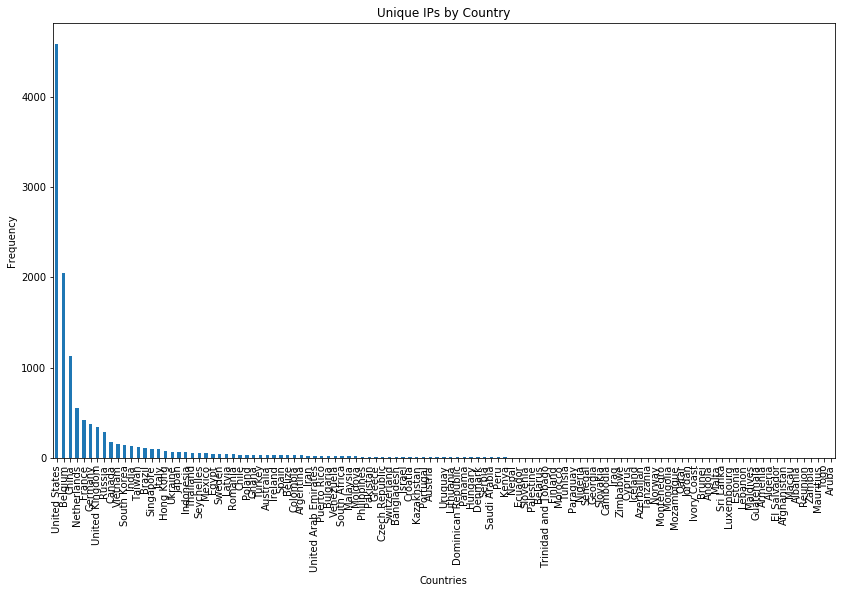

In [26]:
ax = grey_noise_loc['metadata.country_x'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Unique IPs by Country")
ax.set_xlabel("Countries")
ax.set_ylabel("Frequency")
plt.show()

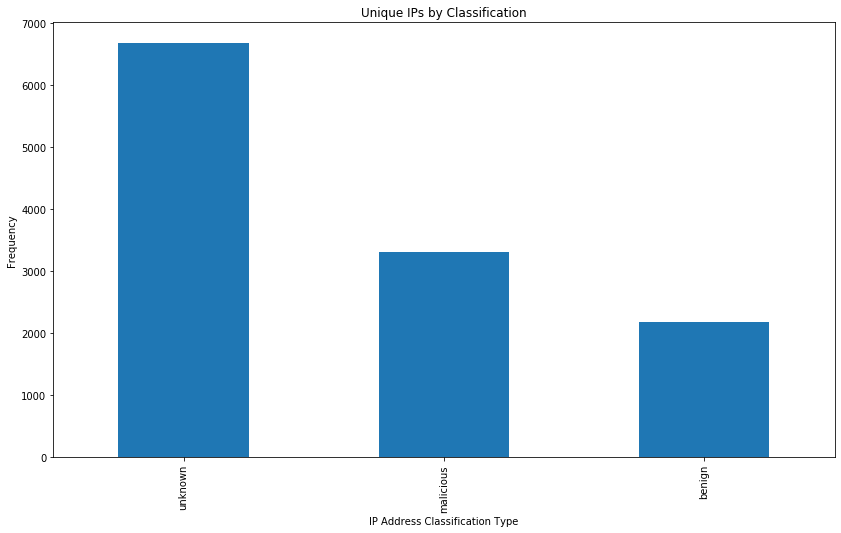

In [27]:
ax = grey_noise_loc['classification'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Unique IPs by Classification")
ax.set_xlabel("IP Address Classification Type")
ax.set_ylabel("Frequency")
plt.show()

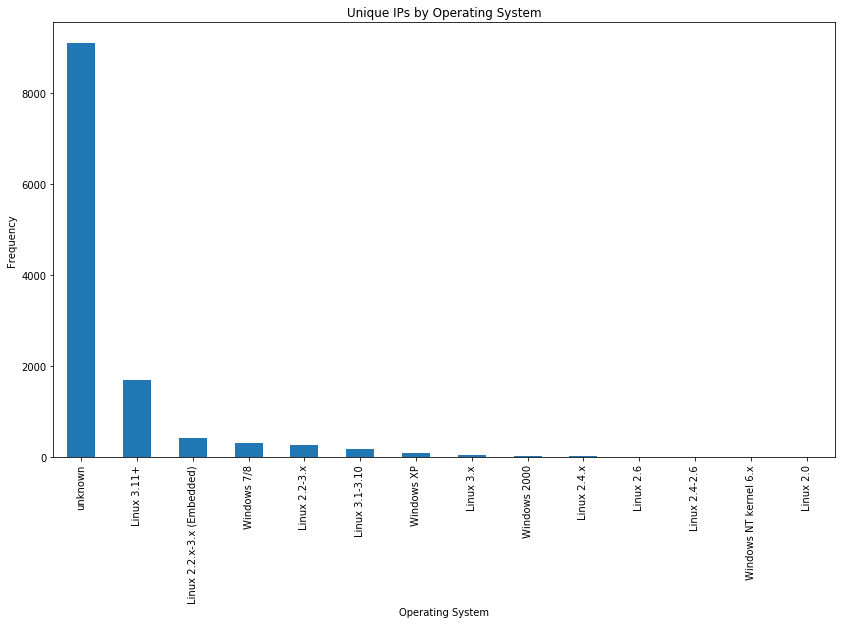

In [28]:
ax = grey_noise_loc['metadata.os'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Unique IPs by Operating System")
ax.set_xlabel("Operating System")
ax.set_ylabel("Frequency")
plt.show()

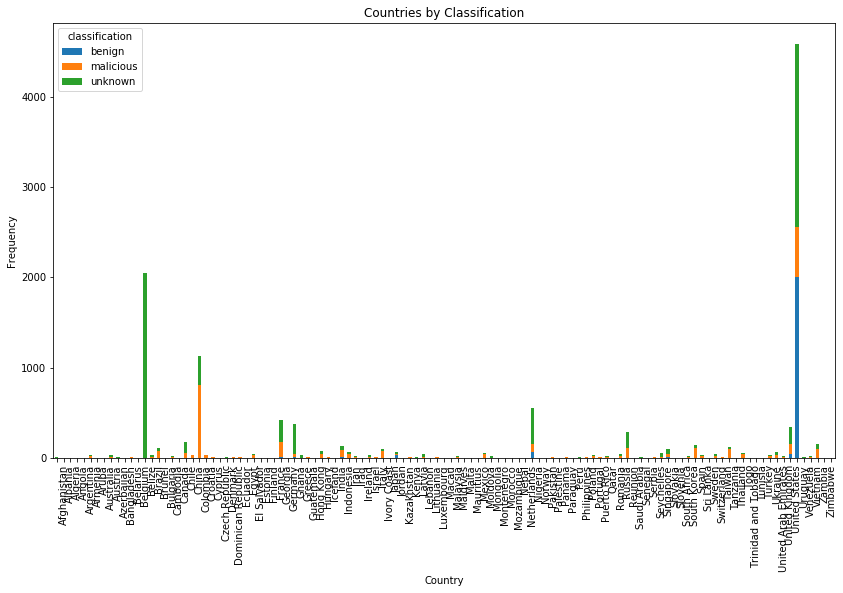

In [29]:
ax = grey_noise_loc.groupby(['metadata.country_x','classification']).size().unstack().plot(kind='bar',
                                                                                    stacked=True,
                                                                                   figsize=(14,8),
                                                                                   title="Countries by Classification")
ax.set_xlabel("Country")
ax.set_ylabel("Frequency")
# plt.xticks(rotation=280)
plt.show()

In [30]:
# Show names domain names
dns = grey_noise_loc['metadata.rdns']
dns = dns.dropna(axis=0)  # remove NA
dns = list(dict.fromkeys(dns)) # Remove duplicates 

for i in dns:
    print(i)


thundersbakery.ie
86.ip-149-56-14.net
mx.spamhaus.org
ec2-54-93-50-35.eu-central-1.compute.amazonaws.com
zg-0312b-251.stretchoid.com
dynamic-ip-adsl.viettel.vn
xx.freeflux.org
do-prod-eu-west-scanner-0402-8.do.binaryedge.ninja
server-185-153-198-240.cloudedic.net
no-reverse-dns-configured.com
registro.lacnic.net
scan-06n.shadowserver.org
50-198-243-206-static.hfc.comcastbusiness.net
ip-112-58.4vendeta.com
ns570281.ip-51-161-12.net
malware-hunter.census.shodan.io
071-067-158-188.biz.spectrum.com
c-50-134-218-103.hsd1.co.comcast.net
scratch-01.sfj.corp.censys.io
113.72.63.218.broad.lc.yn.dynamic.163data.com.cn
scanner21.openportstats.com
160.ip-192-99-152.net
c-50-158-81-186.hsd1.il.comcast.net
190-79-210-16.dyn.dsl.cantv.net
bba590646.alshamil.net.ae
scan049.intrinsec.com
zg-0312c-103.stretchoid.com
196.52.43.61.netsystemsresearch.com
ec2-34-207-73-231.compute-1.amazonaws.com
zg-0312c-457.stretchoid.com
scan-64.security.ipip.net
scanner151.openportstats.com
static-50-53-105-184.bvtn.or.

92.118.161.37.netsystemsresearch.com
201-158.7-30.abanet.net
zg-0312c-178.stretchoid.com
scanner2.scanning.cybergreen.net
96-82-134-211-static.hfc.comcastbusiness.net
197-91-250-58.ftth.mweb.co.za
93-103-96-24.dynamic.t-2.net
209.17.96.194.rdns.cloudsystemnetworks.com
zg-0312b-48.stretchoid.com
zg-0312b-121.stretchoid.com
1-34-129-124.hinet-ip.hinet.net
b18d7b14.virtua.com.br
c151-177-48-20.bredband.comhem.se
170.31.200.77.rev.sfr.net
195-154-211-33.rev.poneytelecom.eu
ua-92-34-93-235.bbcust.telenor.se
zg-0312c-392.stretchoid.com
bb6aacaf.virtua.com.br
maguro.run
mailfind.host
78.189.26.52.static.ttnet.com.tr
45.76.92.251.vultr.com
zg-0312c-423.stretchoid.com
isaak260.static.otenet.gr
serv11155.communilink.com
114-25-51-180.dynamic-ip.hinet.net
customer.krypt.com
178.ip-92-222-78.eu
ns3001311.ip-37-59-48.eu
zg-0312c-315.stretchoid.com
zg-0312c-166.stretchoid.com
srv-109-227-63-3.static.a1.hr
bmtnon1338w-lp130-01-174-91-67-162.dsl.bell.ca
202.28.229.121.broad.nj.js.dynamic.163data.com.c

238.202.228.35.bc.googleusercontent.com
zg-0312b-35.stretchoid.com
ns3041845.ip-188-165-235.eu
zg-0312c-110.stretchoid.com
pool-74-105-122-60.nwrknj.fios.verizon.net
203-213-66-170.static.tpgi.com.au
175-182-68-40.adsl.dynamic.seed.net.tw
c-71-192-92-37.hsd1.ma.comcast.net
36-226-160-35.dynamic-ip.hinet.net
zg-0312c-127.stretchoid.com
234.251.182.45.cabonetfibra.net.br
mx2.alumnosgicaingenieros.com
115.ip-158-69-194.net
ip-51-91-150.eu
ool-2f11c21e.dyn.optonline.net
70.ip-158-69-220.net
zg-0312b-62.stretchoid.com
pool-96-232-195-28.nycmny.fios.verizon.net
ip147.ip-51-161-51.net
173.ip-142-44-160.net
scan-02b.shadowserver.org
196.52.43.84.netsystemsresearch.com
196.52.43.126.netsystemsresearch.com
adsl-181-129-220-163.une.net.co
zg-0312b-137.stretchoid.com
211-23-148-148.hinet-ip.hinet.net
ec2-52-34-70-96.us-west-2.compute.amazonaws.com
165-169-74-188.zeop.re
scan-14c.shadowserver.org
net-5-95-73-175.cust.vodafonedsl.it
213-65-119-131-no2370.tbcn.telia.com
96-68-124-117-static.hfc.comca

126.cust-b24.waldc.net
15.cust-b00.waldc.net
1.cust-b00.waldc.net
162.128-17-84.waldc.net
2.cust-d00.waldc.net
vps.vrnint.ru
mail.miaoulis.be
15.cust-c00.waldc.net
193.cust-c00.waldc.net
182.128-17-84.waldc.net
zg-0312b-138.stretchoid.com
182.cust-d00.waldc.net
host243-248-110-95.serverdedicati.aruba.it
122-117-92-236.hinet-ip.hinet.net
139.cust-b32.waldc.net
248.cust-c00.waldc.net
172.cust-c00.waldc.net
207.128-17-84.waldc.net
c-69-248-57-179.hsd1.nj.comcast.net
172.cust-d00.waldc.net
180.cust-b32.waldc.net
36.cust-d00.waldc.net
240.cust-c00.waldc.net
58.cust-c00.waldc.net
140.cust-b32.waldc.net
69.cust-c00.waldc.net
252.cust-c00.waldc.net
129.cust-b32.waldc.net
adsl-pool2-226.metrotel.net.co
mbz.ftpi.fr
245.128-17-84.waldc.net
220.128-17-84.waldc.net
114.cust-c00.waldc.net
198.cust-b32.waldc.net
23.128-17-84.waldc.net
174.cust-b32.waldc.net
host-197.50.59.238.tedata.net
21.cust-c00.waldc.net
52.ip-54-38-55.eu
63.cust-d00.waldc.net
202.cust-c00.waldc.net
16.cust-b04.waldc.net
h85-8-27

In [31]:
print("There are" ,len(dns), "unique domain names")

There are 4024 unique domain names


In [32]:
# How many of each domain? I expect to see a fair bit of .com, .net, and .be (Belgium)

tld_list = []
for domain in dns: 
    tld = domain.rsplit('.',1)
    tld_end = tld[1]
    tld_list.append(tld_end)

    tld_list

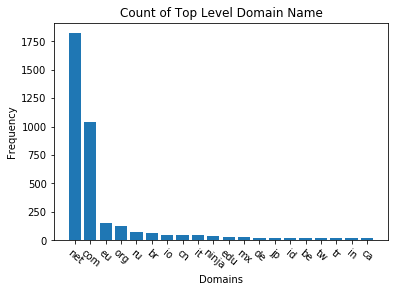

In [33]:
# Get Dict
tld_list_count = collections.Counter(tld_list)
sorted_dict = {k: v for k, v in sorted(tld_list_count.items(), key=lambda item: item[1], reverse=True)}


# PLot
domains = list(sorted_dict.keys())
counts = list(sorted_dict.values())


plt.xlabel('Domains')
plt.ylabel('Frequency')
plt.title("Count of Top Level Domain Name")
plt.xticks(rotation=320)
plt.bar(domains[:20], counts[:20])
plt.show()

As expected, .net and .com are the highest. But this is more .ru than I expected to see and curious what .ninja is. 

### Parse Grey Noise Dataframe  Domain Names
Parse from the dataframe to get a sense of how many do not include  domain name 

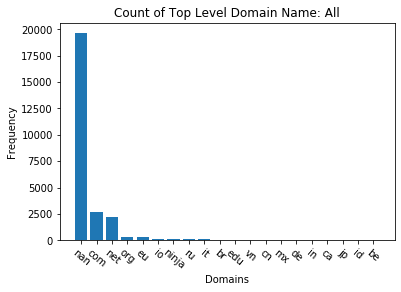

In [34]:
# Show names domain names
domain_end = grey_noise_loc['metadata.rdns']

domains_list =[]
for i in domain_end:
    if type(i) == float: # Can't split on a float
        i = str(i)
        domains_list.append(i)
    else:
        tld = i.rsplit('.', 1)
        tld_end = tld[1]
        domains_list.append(tld_end)
# Give the NaNs some time of value to parse through and split 

# Get Dict
domains_list_count = collections.Counter(domains_list)
sorted_dict_all = {k: v for k, v in sorted(domains_list_count.items(), key=lambda item: item[1], reverse=True)}


# PLot
domains = list(sorted_dict_all.keys())
counts = list(sorted_dict_all.values())


plt.xlabel('Domains')
plt.ylabel('Frequency')
plt.title("Count of Top Level Domain Name: All")
plt.xticks(rotation=320)
plt.bar(domains[:20], counts[:20])
plt.show()


In [35]:
sorted_dict_all

{'nan': 19616,
 'com': 2727,
 'net': 2192,
 'org': 326,
 'eu': 290,
 'io': 151,
 'ninja': 86,
 'ru': 81,
 'it': 78,
 'br': 70,
 'edu': 62,
 'vn': 56,
 'cn': 48,
 'mx': 35,
 'de': 29,
 'in': 27,
 'ca': 24,
 'jp': 22,
 'id': 22,
 'be': 22,
 'pl': 21,
 'ar': 21,
 'fr': 21,
 'tw': 21,
 'tr': 21,
 'ua': 20,
 'se': 18,
 'co': 17,
 'host': 16,
 'ro': 15,
 'au': 14,
 'gr': 13,
 'arpa': 13,
 'biz': 12,
 'th': 10,
 'bg': 9,
 'pt': 9,
 'me': 8,
 'cl': 8,
 'do': 7,
 'uk': 7,
 'us': 6,
 'nl': 6,
 'cloud': 6,
 'ae': 5,
 'sg': 5,
 'info': 5,
 'club': 5,
 'hu': 5,
 'pk': 5,
 'tk': 4,
 'xyz': 4,
 'za': 4,
 'online': 4,
 'ir': 4,
 'il': 4,
 'uy': 4,
 'rs': 4,
 'one': 3,
 'gh': 3,
 'by': 3,
 'sc': 3,
 'ie': 2,
 'lt': 2,
 'sk': 2,
 'company': 2,
 'pro': 2,
 'hr': 2,
 'cz': 2,
 'es': 2,
 'lv': 2,
 'ch': 2,
 'website': 2,
 'pw': 2,
 'ke': 2,
 'kz': 2,
 'ec': 2,
 'zw': 2,
 'space': 2,
 'cat': 1,
 'bn': 1,
 'gov': 1,
 'cy': 1,
 'si': 1,
 'no': 1,
 'dev': 1,
 'ci': 1,
 'center': 1,
 'live': 1,
 'al': 1,
 'fail

### Malicious Domains by country
Parse from the dataframe to get a sense of how many do not include  domain name 

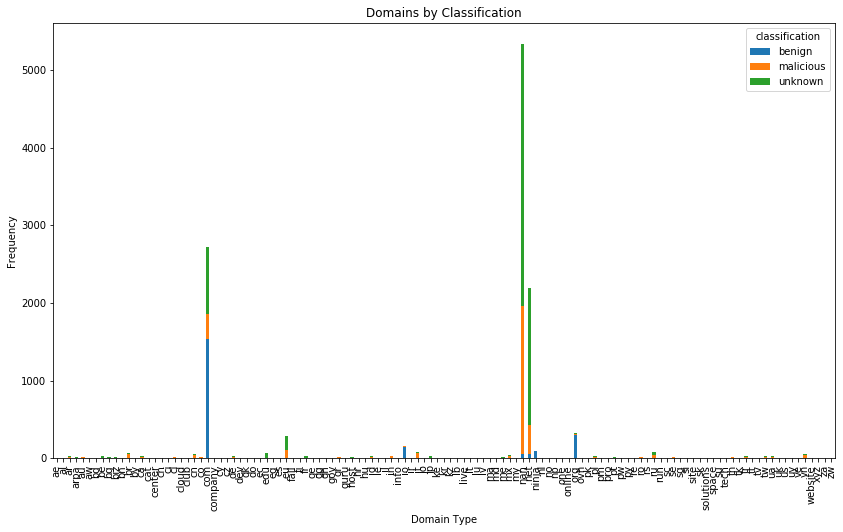

In [36]:
# Convert to pd series and add to df 

grey_noise_loc['domain_ends'] = pd.Series(domains_list) 

ax = grey_noise_loc.groupby(['domain_ends','classification']).size().unstack().plot(kind='bar',
                                                                                    stacked=True,
                                                                                   figsize=(14,8),
                                                                                   title="Domains by Classification")
ax.set_xlabel("Domain Type")
ax.set_ylabel("Frequency")
# plt.xticks(rotation=280)
plt.show()

## Add location data to Parsed_data

In [37]:
parsed_data.head()

,Unnamed: 0,idx,CWR,ECE,URG,ACK,PSH,RST,SYN,FIN,date_time,SRC
0,0,0,0,0,0,0,0,0,0,0,Apr 07 22:27:58,73.231.179.146
1,1,1,0,0,0,0,0,0,0,0,Apr 07 22:27:59,51.68.32.21
2,2,2,0,0,0,0,0,0,0,0,Apr 07 22:27:59,51.68.32.21
3,3,3,0,0,0,0,0,0,0,0,Apr 07 22:27:59,73.231.179.146
4,4,4,0,0,0,0,0,0,0,0,Apr 07 22:27:59,73.231.179.146


In [38]:
grey_noise_loc.head()

,ip,seen,classification,first_seen,last_seen,actor,tags,metadata.country_x,metadata.country_code,metadata.city_x,...,raw_data.web.paths,raw_data.web.useragents,raw_data.ja3,error,id_grey_noise,metadata.city_y,metadata.country_y,lat,lng,domain_ends
0,73.231.179.146,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,nan
1,51.68.32.21,True,malicious,2020-03-17,2020-04-22,unknown,"[Generic IoT Brute Force Attempt, Mirai, Telne...",France,FR,Roubaix,...,[],[],[],NaN,2,Roubaix,France,NaN,NaN,ie
2,149.56.14.86,True,malicious,2019-12-30,2020-04-21,unknown,"[SSH Bruteforcer, SSH Scanner, SSH Worm]",Canada,CA,Montréal,...,[],[],[],NaN,3,Montréal,Canada,45.50,-73.5833,net
3,167.71.140.81,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,nan
4,165.22.203.170,True,unknown,2019-07-28,2020-04-08,unknown,"[DNS Scanner, FTP Scanner, Router RPC Scanner,...",Netherlands,NL,Amsterdam,...,[],[],[],NaN,5,Amsterdam,Netherlands,52.35,4.9166,org


In [39]:
all_data = pd.merge(parsed_data, grey_noise_loc, how='left', 
                   left_on=['SRC'], right_on=['ip'])

In [40]:
all_data['date_time'].tail()

1717357    Apr 14 17:59:26
1717358    Apr 14 17:59:26
1717359    Apr 14 17:59:26
1717360    Apr 14 17:59:26
1717361    Apr 14 17:59:26
Name: date_time, dtype: object

In [41]:
# Drop rows without lat long
all_data_just_location = all_data[all_data['lat'].notna()]
all_data_just_location = all_data[all_data['lng'].notna()]

In [42]:
all_data_just_location['date_time'].tail() 

1713527    Apr 11 19:22:50
1713529    Apr 11 19:22:50
1713530    Apr 11 19:22:50
1713553    Apr 11 19:22:53
1713554    Apr 11 19:22:53
Name: date_time, dtype: object

In [43]:
# all_data_just_location['date_time']

In [44]:
# test3 =all_data_just_location['date_time'] = pd.to_datetime(all_data_just_location['date_time']).dt.time
# #test2= all_data_just_location['date_time'] = [datetime.datetime.strptime(i, "%b %m %H:%M:%S") for i in all_data_just_location['date_time']]
# test3

In [45]:
all_data_just_location.to_csv('all_data_just_location.csv', encoding='utf-8')

In [46]:
# time = all_data['date_time'] = [datetime.datetime.strptime(i, "%b %d %H:%M:%S") for i in all_data['date_time']]
all_data['date_time'] = [datetime.datetime.strptime(i, "%b %d %H:%M:%S") for i in all_data['date_time']]
# all_data_just_location.head()

In [47]:
#Change back to string
all_data['timestamp'] = [datetime.datetime.strftime(i, "%b %d %H:%M:%S") for i in all_data['date_time']]

In [48]:
all_data['timestamp']

0          Apr 07 22:27:58
1          Apr 07 22:27:59
2          Apr 07 22:27:59
3          Apr 07 22:27:59
4          Apr 07 22:27:59
                ...       
1717357    Apr 14 17:59:26
1717358    Apr 14 17:59:26
1717359    Apr 14 17:59:26
1717360    Apr 14 17:59:26
1717361    Apr 14 17:59:26
Name: timestamp, Length: 1717362, dtype: object

In [49]:
type(all_data['timestamp'].iloc[0])

str

In [50]:
# add correct year to timestamp
all_data['timestamp'] = [ i[:6] + " 2020 " + i[7:] for i in all_data['timestamp']]

In [56]:
# Switch back to timestamp
all_data['timestamp'] = [datetime.datetime.strptime(i, "%b %d %Y %H:%M:%S") for i in all_data['timestamp']]

In [60]:
all_data['timestamp'].iloc[0]

Timestamp('2020-04-07 22:27:58')

In [61]:
# Save to CSV
all_data.to_csv('parsed_data_with_location.csv', encoding='utf-8')
